In [ ]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [ ]:
file_path = r"C:\Users\MatanLevy\Desktop\MBA\Project in Big Data analytics\FINAL\vm_links.pkl"

# Cleaning the Data

In [ ]:
with open(file_path, 'rb') as f:
    data = pickle.load(f)
df = pd.DataFrame(data)

In [ ]:
df.head(10)

,TripId,OPERATOR_ID,CLUSTER_ID,License_Plate,LINE_SHORT_NAME,OriginAimedDepartureTime,LINE_DESC,RouteId,Direction,Alternative,stopOrder,actualArrivalTime,actualDepartureTime,Linkref,linkTime,time_first_stop(s),Link_travel_time(s),Trip_End
0,1382429,3,91,7560469,102,2023-02-03 00:30:00,10102-1-#,10102,1,#,2,2023-02-03 00:31:53,2023-02-03 00:32:11,2721:2528,113,106,7,False
1,1382429,3,91,7560469,102,2023-02-03 00:30:00,10102-1-#,10102,1,#,3,2023-02-03 00:32:35,2023-02-03 00:32:49,2528:2339,42,18,24,False
2,1382429,3,91,7560469,102,2023-02-03 00:30:00,10102-1-#,10102,1,#,4,2023-02-03 00:33:14,2023-02-03 00:33:34,2339:2345,39,14,25,False
3,1382429,3,91,7560469,102,2023-02-03 00:30:00,10102-1-#,10102,1,#,7,2023-02-03 00:34:34,2023-02-03 00:34:53,2150:2152,24,16,8,False
4,1382429,3,91,7560469,102,2023-02-03 00:30:00,10102-1-#,10102,1,#,8,2023-02-03 00:35:09,2023-02-03 00:35:30,2152:2163,35,19,16,False
5,1382429,3,91,7560469,102,2023-02-03 00:30:00,10102-1-#,10102,1,#,11,2023-02-03 00:36:52,2023-02-03 00:37:08,2548:2160,43,13,30,False
6,1382429,3,91,7560469,102,2023-02-03 00:30:00,10102-1-#,10102,1,#,12,2023-02-03 00:37:15,2023-02-03 00:37:29,2160:2168,23,16,7,False
7,1382429,3,91,7560469,102,2023-02-03 00:30:00,10102-1-#,10102,1,#,13,2023-02-03 00:38:51,2023-02-03 00:39:05,2168:201,96,14,82,False
8,1382429,3,91,7560469,102,2023-02-03 00:30:00,10102-1-#,10102,1,#,14,2023-02-03 00:39:48,2023-02-03 00:40:07,201:2954,57,14,43,False
9,1382429,3,91,7560469,102,2023-02-03 00:30:00,10102-1-#,10102,1,#,15,2023-02-03 00:40:10,2023-02-03 00:40:28,2954:2955,22,19,3,False


In [ ]:
# Function to perform data preparation and drop specific columns
def data_preparation(df):
    columns_to_remove = ['License_Plate', 'LINE_DESC','CLUSTER_ID','Alternative','OriginAimedDepartureTime','Direction'
                        ,'RouteId']

    # Print the column names present in the DataFrame for verification
    print("Column names in DataFrame:")
    print(df.columns)

    # Check if all columns in 'columns_to_remove' are present in the DataFrame
    for col in columns_to_remove:
        if col not in df.columns:
            print(f"Column '{col}' not found in the DataFrame.")

    # Drop the specified columns
    df = df.drop(columns=columns_to_remove)

    return df
df = data_preparation(df)

Column names in DataFrame:
Index(['TripId', 'OPERATOR_ID', 'CLUSTER_ID', 'License_Plate',
       'LINE_SHORT_NAME', 'OriginAimedDepartureTime', 'LINE_DESC', 'RouteId',
       'Direction', 'Alternative', 'stopOrder', 'actualArrivalTime',
       'actualDepartureTime', 'Linkref', 'linkTime', 'time_first_stop(s)',
       'Link_travel_time(s)', 'Trip_End'],
      dtype='object')


In [ ]:
df.head(10)

,TripId,OPERATOR_ID,LINE_SHORT_NAME,stopOrder,actualArrivalTime,actualDepartureTime,Linkref,linkTime,time_first_stop(s),Link_travel_time(s),Trip_End
0,1382429,3,102,2,2023-02-03 00:31:53,2023-02-03 00:32:11,2721:2528,113,106,7,False
1,1382429,3,102,3,2023-02-03 00:32:35,2023-02-03 00:32:49,2528:2339,42,18,24,False
2,1382429,3,102,4,2023-02-03 00:33:14,2023-02-03 00:33:34,2339:2345,39,14,25,False
3,1382429,3,102,7,2023-02-03 00:34:34,2023-02-03 00:34:53,2150:2152,24,16,8,False
4,1382429,3,102,8,2023-02-03 00:35:09,2023-02-03 00:35:30,2152:2163,35,19,16,False
5,1382429,3,102,11,2023-02-03 00:36:52,2023-02-03 00:37:08,2548:2160,43,13,30,False
6,1382429,3,102,12,2023-02-03 00:37:15,2023-02-03 00:37:29,2160:2168,23,16,7,False
7,1382429,3,102,13,2023-02-03 00:38:51,2023-02-03 00:39:05,2168:201,96,14,82,False
8,1382429,3,102,14,2023-02-03 00:39:48,2023-02-03 00:40:07,201:2954,57,14,43,False
9,1382429,3,102,15,2023-02-03 00:40:10,2023-02-03 00:40:28,2954:2955,22,19,3,False


In [ ]:
# Function to perform data transformation for relevant colums

def data_transformation(df):
    # Convert to datetime
    df['actualDepartureTime'] = pd.to_datetime(df['actualDepartureTime'])
    df['actualArrivalTime'] = pd.to_datetime(df['actualArrivalTime'])

    # Convert the "actualArrivalTime" and "actualDepartureTime" column to a datetimelike value and create a copy of the DataFrame
    df_copy = df.copy()
    df_copy["timestamp1"] = pd.to_datetime(df_copy["actualArrivalTime"])
    df_copy["timestamp2"] = pd.to_datetime(df_copy["actualDepartureTime"])

    # Add the two new columns to the copied DataFrame using .loc indexer
    df_copy.loc[:, "date"] = df_copy["timestamp1"].dt.date
    df_copy.loc[:, "date"] = df_copy["timestamp2"].dt.date
    df_copy.loc[:, "Arrival_time"] = df_copy["timestamp1"].dt.time
    df_copy.loc[:, "Departure_time"] = df_copy["timestamp2"].dt.time

    # Update the original DataFrame with the changes made in the copy
    df = df_copy

    return df
df = data_transformation(df)

In [ ]:
def process_dataframe(df):
    columns_to_check_Negative = ['linkTime', 'time_first_stop(s)', 'Link_travel_time(s)']
    negative_counts = {}

    for column in columns_to_check_Negative:
        # Step 1: Count the number of negative values in the column
        negative_values = df.loc[df[column] < 0, column]
        count = negative_values.count()
        negative_counts[column] = count

        # Step 2: Remove rows with negative values in the column
        df = df.loc[df[column] >= 0]

    # Step 3: Print the counts of negative values for each column
    for column, count in negative_counts.items():
        print(f"Number of negative values in {column}: {count}")

    # Step 4: Find the minimum values for the selected columns
    min_values = df[columns_to_check_Negative].min()
    print("\n" + "Minimum values for selected columns following removal of negative values:")
    print(min_values)

    return df
df = process_dataframe(df)

Number of negative values in linkTime: 6953
Number of negative values in time_first_stop(s): 3538
Number of negative values in Link_travel_time(s): 2779

Minimum values for selected columns following removal of negative values:
linkTime               0
time_first_stop(s)     0
Link_travel_time(s)    0
dtype: int64


In [ ]:
df.head(10)

,TripId,OPERATOR_ID,LINE_SHORT_NAME,stopOrder,actualArrivalTime,actualDepartureTime,Linkref,linkTime,time_first_stop(s),Link_travel_time(s),Trip_End,timestamp1,timestamp2,date,Arrival_time,Departure_time
0,1382429,3,102,2,2023-02-03 00:31:53,2023-02-03 00:32:11,2721:2528,113,106,7,False,2023-02-03 00:31:53,2023-02-03 00:32:11,2023-02-03,00:31:53,00:32:11
1,1382429,3,102,3,2023-02-03 00:32:35,2023-02-03 00:32:49,2528:2339,42,18,24,False,2023-02-03 00:32:35,2023-02-03 00:32:49,2023-02-03,00:32:35,00:32:49
2,1382429,3,102,4,2023-02-03 00:33:14,2023-02-03 00:33:34,2339:2345,39,14,25,False,2023-02-03 00:33:14,2023-02-03 00:33:34,2023-02-03,00:33:14,00:33:34
3,1382429,3,102,7,2023-02-03 00:34:34,2023-02-03 00:34:53,2150:2152,24,16,8,False,2023-02-03 00:34:34,2023-02-03 00:34:53,2023-02-03,00:34:34,00:34:53
4,1382429,3,102,8,2023-02-03 00:35:09,2023-02-03 00:35:30,2152:2163,35,19,16,False,2023-02-03 00:35:09,2023-02-03 00:35:30,2023-02-03,00:35:09,00:35:30
5,1382429,3,102,11,2023-02-03 00:36:52,2023-02-03 00:37:08,2548:2160,43,13,30,False,2023-02-03 00:36:52,2023-02-03 00:37:08,2023-02-03,00:36:52,00:37:08
6,1382429,3,102,12,2023-02-03 00:37:15,2023-02-03 00:37:29,2160:2168,23,16,7,False,2023-02-03 00:37:15,2023-02-03 00:37:29,2023-02-03,00:37:15,00:37:29
7,1382429,3,102,13,2023-02-03 00:38:51,2023-02-03 00:39:05,2168:201,96,14,82,False,2023-02-03 00:38:51,2023-02-03 00:39:05,2023-02-03,00:38:51,00:39:05
8,1382429,3,102,14,2023-02-03 00:39:48,2023-02-03 00:40:07,201:2954,57,14,43,False,2023-02-03 00:39:48,2023-02-03 00:40:07,2023-02-03,00:39:48,00:40:07
9,1382429,3,102,15,2023-02-03 00:40:10,2023-02-03 00:40:28,2954:2955,22,19,3,False,2023-02-03 00:40:10,2023-02-03 00:40:28,2023-02-03,00:40:10,00:40:28


# Preparing the data for analysis with relevant features

### Model input varibales

![Photo.png](attachment:Photo.png)

Adding "K-1 to 3 _Travel_Time" represeting the last 3 rides seperately

In [ ]:
def calculate_K_travel_times(df):
    # Calculate K-1 to K-3 last travel time for Linkref
    df['K-1_Travel_Time'] = df.groupby('Linkref')['Link_travel_time(s)'].shift(1)
    df['K-2_Travel_Time'] = df.groupby('Linkref')['Link_travel_time(s)'].shift(2)
    df['K-3_Travel_Time'] = df.groupby('Linkref')['Link_travel_time(s)'].shift(3)

    # Identify the first ride of the day for each Linkref
    first_ride_mask = (df['date'] != df['date'].shift(1)) & (df['date'] != df['date'].shift(2))

    # Set K-1 to K-3 travel times to 0 for the first ride of the day
    df.loc[first_ride_mask, 'K-1_Travel_Time'] = 0
    df.loc[first_ride_mask, 'K-2_Travel_Time'] = 0
    df.loc[first_ride_mask, 'K-3_Travel_Time'] = 0

    # Fill missing values with 0
    df['K-1_Travel_Time'].fillna(0, inplace=True)
    df['K-2_Travel_Time'].fillna(0, inplace=True)
    df['K-3_Travel_Time'].fillna(0, inplace=True)

    return df
df = calculate_K_travel_times(df)

Adding "K-1 to 3 _HeadWay_Time" represeting the interval time between consecutive rides for the last 3 rides seperately

In [ ]:
def calculate_headway_times(df):
    # Sort the DataFrame by 'Linkref' and 'actualArrivalTime'
    df = df.sort_values(['Linkref', 'actualArrivalTime'])

    # Convert 'actualArrivalTime' to datetime if it is not already
    df['actualArrivalTime'] = pd.to_datetime(df['actualArrivalTime'])

    # Group by 'Linkref' and calculate the headway time using the provided formula
    df['Headway_Time'] = df.groupby('Linkref')['actualArrivalTime'].diff().dt.total_seconds().fillna(0)

    # Calculate K-1, K-2, and K-3 headway times for each group
    df['K-1_Headway_Time'] = df.groupby('Linkref')['Headway_Time'].shift(1).fillna(0)
    df['K-2_Headway_Time'] = df.groupby('Linkref')['Headway_Time'].shift(2).fillna(0)
    df['K-3_Headway_Time'] = df.groupby('Linkref')['Headway_Time'].shift(3).fillna(0)

    # Fill NaN values for K-1, K-2, and K-3 headway times with the mean of the column based on the same Linkref
    df['K-1_Headway_Time'] = df.groupby('Linkref')['K-1_Headway_Time'].transform(lambda x: x.replace(0, np.nan).fillna(x.mean()))
    df['K-2_Headway_Time'] = df.groupby('Linkref')['K-2_Headway_Time'].transform(lambda x: x.replace(0, np.nan).fillna(x.mean()))
    df['K-3_Headway_Time'] = df.groupby('Linkref')['K-3_Headway_Time'].transform(lambda x: x.replace(0, np.nan).fillna(x.mean()))

    # Set headway time to 0 for the first ride of the day
    first_ride_mask = (df['actualArrivalTime'].dt.date != df['actualArrivalTime'].dt.date.shift(1)) & (df['actualArrivalTime'].dt.date != df['actualArrivalTime'].dt.date.shift(2))
    df.loc[first_ride_mask, 'Headway_Time'] = 0

    return df

df = calculate_headway_times(df)

## Calculate the time index

In [ ]:
# Function to calculate the time index

def calculate_time_index(df):
    # Define the time periods
    weekday_am_peak = (df['actualArrivalTime'].dt.hour >= 7) & (df['actualArrivalTime'].dt.hour < 9) & (df['actualArrivalTime'].dt.dayofweek <= 3)
    weekday_pm_peak = (df['actualArrivalTime'].dt.hour >= 16) & (df['actualArrivalTime'].dt.hour < 18) & (df['actualArrivalTime'].dt.dayofweek <= 3)
    weekday_off_peak = ~weekday_am_peak & ~weekday_pm_peak
    weekend_all_day = df['actualArrivalTime'].dt.dayofweek.isin([4, 5])

    # Assign the time period based on the defined conditions
    df.loc[weekday_am_peak, 'Time_Period'] = 'Weekday a.m. peak hours'
    df.loc[weekday_pm_peak, 'Time_Period'] = 'Weekday p.m. peak hours'
    df.loc[weekday_off_peak, 'Time_Period'] = 'Weekday off-peak hours'
    df.loc[weekend_all_day, 'Time_Period'] = 'Weekend all-day'

    # Sort the DataFrame by the original index
    df = df.sort_index()

    return df

df = calculate_time_index(df)


## Calculate the Delay index

## First step: Calculate the Bus Delay = Actual travel time - free flow travel time - Average bus dwelling time

## Second step: Calculate the Delay Ratio

![Screenshot%202023-07-24%20142955.png](attachment:Screenshot%202023-07-24%20142955.png)

Assumptions used:

1) Free Flow travel time will is the time it would take for the bus to travel between two stops under ideal traffic conditions. for that we will rake the average time between two stops for the last ride of the bus for all Friday days/Sunday for missing observation. Else will be total DF average.


2) Average bus dwelling time will be the diffrence between actualDepartureTime to actualArrivalTime.

In [ ]:
def calculate_delay_index(df):
    # Convert actualArrivalTime to datetime if it's not already in that format
    if not pd.api.types.is_datetime64_any_dtype(df['actualArrivalTime']):
        df['actualArrivalTime'] = pd.to_datetime(df['actualArrivalTime'])

    # Filter rows for the last bus travel on Friday and Sunday
    friday_last_rides = df[df['actualArrivalTime'].dt.day_name() == 'Friday'].groupby('Linkref').tail(1)
    sunday_last_rides = df[df['actualArrivalTime'].dt.day_name() == 'Sunday'].groupby('Linkref').tail(1)

    # Concatenate Friday and Sunday last rides
    last_rides = pd.concat([friday_last_rides, sunday_last_rides])

    if last_rides.empty:
        # If there are no rides on Friday or Sunday, set 'average_free_flow_time' to the average of 'Link_travel_time(s)'
        df['average_free_flow_time'] = df['Link_travel_time(s)'].mean()
    else:
        # Calculate the average Free Flow Travel Time for the last rides on Friday and Sunday
        avg_free_flow_by_linkref = last_rides.groupby('Linkref')['Link_travel_time(s)'].mean()
        last_rides['average_free_flow_time'] = last_rides['Linkref'].map(avg_free_flow_by_linkref)

        # If there are missing average_free_flow_time for Friday rides, replace with Sunday's average
        avg_free_flow_sunday_by_linkref = sunday_last_rides.groupby('Linkref')['Link_travel_time(s)'].mean()
        last_rides.loc[last_rides['average_free_flow_time'].isnull(), 'average_free_flow_time'] = last_rides['Linkref'].map(avg_free_flow_sunday_by_linkref)

        # Drop duplicates based on 'Linkref' to ensure it has unique values
        last_rides.drop_duplicates(subset='Linkref', keep='first', inplace=True)

        # Merge back the average_free_flow_time column to the original DataFrame based on Linkref
        df['average_free_flow_time'] = df['Linkref'].map(last_rides.set_index('Linkref')['average_free_flow_time'])

    # Calculate Average_Bus_Dwelling_Time for each observation based on the same Linkref
    df['Arrival_time'] = pd.to_datetime(df['Arrival_time'], format='%H:%M:%S')
    df['Departure_time'] = pd.to_datetime(df['Departure_time'], format='%H:%M:%S')
    df['Average_Bus_Dwelling_Time'] = (df['Departure_time'] - df['Arrival_time']).dt.total_seconds()
    avg_dwell_time_by_linkref = df.groupby('Linkref')['Average_Bus_Dwelling_Time'].mean()
    df['Average_Bus_Dwelling_Time'] = df['Linkref'].map(avg_dwell_time_by_linkref)

    # Calculate Bus_Delay for each observation based on the same Linkref
    df['Bus_Delay'] = df['Link_travel_time(s)'] - df['average_free_flow_time'] - df['Average_Bus_Dwelling_Time']

    # Force Bus_Delay to be 0 if it's negative
    df['Bus_Delay'] = df['Bus_Delay'].clip(lower=0)

    # Calculate Delay_Ratio for each observation
    df['Delay_Ratio'] = df['Bus_Delay'] / (df['average_free_flow_time'] + df['Average_Bus_Dwelling_Time'])

    # Set all negative Delay_Ratio values and NaN values to 0 and classify them as Level 1
    df.loc[(df['Delay_Ratio'] < 0) | df['Delay_Ratio'].isnull(), 'Delay_Ratio'] = 0
    df['Delay_Level'] = pd.cut(df['Delay_Ratio'], bins=[0, 0.25, 0.5, 0.75, float('inf')], labels=['Level 1', 'Level 2', 'Level 3', 'Level 4'], right=False)

    return df

df = calculate_delay_index(df)

In [ ]:
df.head(10)

,TripId,OPERATOR_ID,LINE_SHORT_NAME,stopOrder,actualArrivalTime,actualDepartureTime,Linkref,linkTime,time_first_stop(s),Link_travel_time(s),...,Headway_Time,K-1_Headway_Time,K-2_Headway_Time,K-3_Headway_Time,Time_Period,average_free_flow_time,Average_Bus_Dwelling_Time,Bus_Delay,Delay_Ratio,Delay_Level
0,1382429,3,102,2,2023-02-03 00:31:53,2023-02-03 00:32:11,2721:2528,113,106,7,...,0.0,2480.0,3500.0,5983.0,Weekend all-day,6.0,22.676516,0.0,0.0,Level 1
1,1382429,3,102,3,2023-02-03 00:32:35,2023-02-03 00:32:49,2528:2339,42,18,24,...,0.0,1204.0,1278.0,3501.0,Weekend all-day,24.5,18.201128,0.0,0.0,Level 1
2,1382429,3,102,4,2023-02-03 00:33:14,2023-02-03 00:33:34,2339:2345,39,14,25,...,0.0,1202.0,1283.0,1109.0,Weekend all-day,26.0,24.890580,0.0,0.0,Level 1
3,1382429,3,102,7,2023-02-03 00:34:34,2023-02-03 00:34:53,2150:2152,24,16,8,...,0.0,3486.0,1453.0,5816.0,Weekend all-day,9.0,19.432638,0.0,0.0,Level 1
4,1382429,3,102,8,2023-02-03 00:35:09,2023-02-03 00:35:30,2152:2163,35,19,16,...,0.0,3477.0,1457.0,5807.0,Weekend all-day,14.5,16.512922,0.0,0.0,Level 1
5,1382429,3,102,11,2023-02-03 00:36:52,2023-02-03 00:37:08,2548:2160,43,13,30,...,0.0,1437.0,85204.0,1184.0,Weekend all-day,66.0,26.500000,0.0,0.0,Level 1
6,1382429,3,102,12,2023-02-03 00:37:15,2023-02-03 00:37:29,2160:2168,23,16,7,...,0.0,1249.0,1313.0,1083.0,Weekend all-day,15.5,18.081062,0.0,0.0,Level 1
7,1382429,3,102,13,2023-02-03 00:38:51,2023-02-03 00:39:05,2168:201,96,14,82,...,0.0,895.0,1485.0,84015.0,Weekend all-day,74.5,16.952381,0.0,0.0,Level 1
8,1382429,3,102,14,2023-02-03 00:39:48,2023-02-03 00:40:07,201:2954,57,14,43,...,0.0,276444.8,241922.6,120943.2,Weekend all-day,32.5,18.600000,0.0,0.0,Level 1
9,1382429,3,102,15,2023-02-03 00:40:10,2023-02-03 00:40:28,2954:2955,22,19,3,...,0.0,1367.0,1517.0,396.0,Weekend all-day,3.0,18.443673,0.0,0.0,Level 1


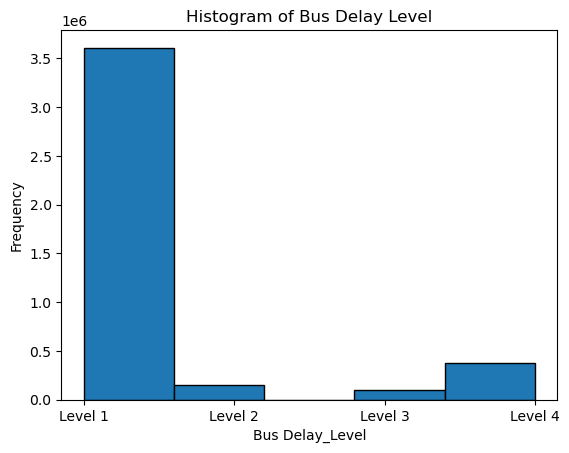

In [ ]:
plt.hist(df['Delay_Level'], bins=5, edgecolor='black')
plt.xlabel('Bus Delay_Level')
plt.ylabel('Frequency')
plt.title('Histogram of Bus Delay Level')
plt.show()

In [ ]:
# Check for missing values in a DataFrame
missing_values = df.isnull().sum()
print(missing_values)

TripId                            0
OPERATOR_ID                       0
LINE_SHORT_NAME                   0
stopOrder                         0
actualArrivalTime                 0
actualDepartureTime          120831
Linkref                           0
linkTime                          0
time_first_stop(s)                0
Link_travel_time(s)               0
Trip_End                          0
timestamp1                        0
timestamp2                   120831
date                         120831
Arrival_time                      0
Departure_time               120831
K-1_Travel_Time                   0
K-2_Travel_Time                   0
K-3_Travel_Time                   0
Headway_Time                      0
K-1_Headway_Time                  0
K-2_Headway_Time                  0
K-3_Headway_Time                  0
Time_Period                       0
average_free_flow_time           50
Average_Bus_Dwelling_Time     48156
Bus_Delay                     48206
Delay_Ratio                 

In [ ]:
df = df.dropna()

In [ ]:
# Check for missing values in a DataFrame
missing_values = df.isnull().sum()
print(missing_values)

TripId                       0
OPERATOR_ID                  0
LINE_SHORT_NAME              0
stopOrder                    0
actualArrivalTime            0
actualDepartureTime          0
Linkref                      0
linkTime                     0
time_first_stop(s)           0
Link_travel_time(s)          0
Trip_End                     0
timestamp1                   0
timestamp2                   0
date                         0
Arrival_time                 0
Departure_time               0
K-1_Travel_Time              0
K-2_Travel_Time              0
K-3_Travel_Time              0
Headway_Time                 0
K-1_Headway_Time             0
K-2_Headway_Time             0
K-3_Headway_Time             0
Time_Period                  0
average_free_flow_time       0
Average_Bus_Dwelling_Time    0
Bus_Delay                    0
Delay_Ratio                  0
Delay_Level                  0
dtype: int64


# ANN Model

In [ ]:
df

,TripId,OPERATOR_ID,LINE_SHORT_NAME,stopOrder,actualArrivalTime,actualDepartureTime,Linkref,linkTime,time_first_stop(s),Link_travel_time(s),...,Headway_Time,K-1_Headway_Time,K-2_Headway_Time,K-3_Headway_Time,Time_Period,average_free_flow_time,Average_Bus_Dwelling_Time,Bus_Delay,Delay_Ratio,Delay_Level
0,1382429,3,102,2,2023-02-03 00:31:53,2023-02-03 00:32:11,2721:2528,113,106,7,...,0.0,2480.0,3500.0,5983.0,Weekend all-day,6.0,22.676516,0.0,0.0,Level 1
1,1382429,3,102,3,2023-02-03 00:32:35,2023-02-03 00:32:49,2528:2339,42,18,24,...,0.0,1204.0,1278.0,3501.0,Weekend all-day,24.5,18.201128,0.0,0.0,Level 1
2,1382429,3,102,4,2023-02-03 00:33:14,2023-02-03 00:33:34,2339:2345,39,14,25,...,0.0,1202.0,1283.0,1109.0,Weekend all-day,26.0,24.890580,0.0,0.0,Level 1
3,1382429,3,102,7,2023-02-03 00:34:34,2023-02-03 00:34:53,2150:2152,24,16,8,...,0.0,3486.0,1453.0,5816.0,Weekend all-day,9.0,19.432638,0.0,0.0,Level 1
4,1382429,3,102,8,2023-02-03 00:35:09,2023-02-03 00:35:30,2152:2163,35,19,16,...,0.0,3477.0,1457.0,5807.0,Weekend all-day,14.5,16.512922,0.0,0.0,Level 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4244246,11863404,3,4,23,2023-02-28 08:32:58,2023-02-28 08:33:16,3254:1849,50,17,33,...,3099.0,83703.0,2986.0,83419.0,Weekday a.m. peak hours,40.5,34.418605,0.0,0.0,Level 1
4244247,11863404,3,4,24,2023-02-28 08:33:22,2023-02-28 08:33:37,1849:1850,24,18,6,...,3058.0,37179.0,1170.0,2347.0,Weekday a.m. peak hours,23.5,22.856383,0.0,0.0,Level 1
4244248,11863404,3,4,25,2023-02-28 08:34:05,2023-02-28 08:34:25,1850:1852,43,15,28,...,3023.0,37170.0,1220.0,2322.0,Weekday a.m. peak hours,26.5,24.113718,0.0,0.0,Level 1
4244249,11863404,3,4,26,2023-02-28 08:35:02,2023-02-28 08:35:31,1852:956,57,20,37,...,3022.0,37184.0,1218.0,2328.0,Weekday a.m. peak hours,18.0,22.725599,0.0,0.0,Level 1


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4110101 entries, 0 to 4244250
Data columns (total 29 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   TripId                     int64         
 1   OPERATOR_ID                int64         
 2   LINE_SHORT_NAME            object        
 3   stopOrder                  int64         
 4   actualArrivalTime          datetime64[ns]
 5   actualDepartureTime        datetime64[ns]
 6   Linkref                    object        
 7   linkTime                   int64         
 8   time_first_stop(s)         int64         
 9   Link_travel_time(s)        int64         
 10  Trip_End                   bool          
 11  timestamp1                 datetime64[ns]
 12  timestamp2                 datetime64[ns]
 13  date                       object        
 14  Arrival_time               datetime64[ns]
 15  Departure_time             datetime64[ns]
 16  K-1_Travel_Time            float64  

In [ ]:
print(df.describe())

             TripId   OPERATOR_ID     stopOrder      linkTime  \
count  4.110101e+06  4.110101e+06  4.110101e+06  4.110101e+06   
mean   5.144057e+07  3.199560e+00  2.334735e+01  8.456639e+01   
std    1.358487e+08  2.507071e+00  1.472283e+01  1.286725e+02   
min    0.000000e+00  3.000000e+00  2.000000e+00  0.000000e+00   
25%    6.695792e+06  3.000000e+00  1.200000e+01  3.900000e+01   
50%    1.184501e+07  3.000000e+00  2.100000e+01  5.700000e+01   
75%    3.131875e+07  3.000000e+00  3.200000e+01  9.800000e+01   
max    5.850795e+08  3.800000e+01  8.400000e+01  4.203500e+04   

       time_first_stop(s)  Link_travel_time(s)  K-1_Travel_Time  \
count        4.110101e+06         4.110101e+06     4.110101e+06   
mean         3.425131e+01         5.031507e+01     5.006523e+01   
std          9.936413e+01         7.611489e+01     7.546368e+01   
min          0.000000e+00         0.000000e+00     0.000000e+00   
25%          1.800000e+01         1.400000e+01     1.400000e+01   
50%         

In [ ]:
test = df['Linkref'].unique()

# Build the dictionary with values from 'test' as keys and keys going up by 1 as values
unique_dict = {value: i+1 for i, value in enumerate(test)}

# Create the 'LinkrefID' column by mapping the 'Linkref' column with the dictionary
df['LinkrefID'] = df['Linkref'].map(unique_dict)

In [ ]:
# Select features (X) and target variable (y)
X = df[['actualArrivalTime', 'actualDepartureTime', 'K-1_Travel_Time', 'K-2_Travel_Time',
        'K-3_Travel_Time', 'Headway_Time', 'K-1_Headway_Time', 'K-2_Headway_Time', 'K-3_Headway_Time',
        'Delay_Level', 'Time_Period','LinkrefID']]

y = df['Link_travel_time(s)']

print("X before preprocessing:")
print(X.head())

# Replace missing values with column means
X = X.fillna(X.mean())

# Extract Hour, Minute, and Second from ArrivalTime and DepartureTime
X['ArrivalTimeHour'] = X['actualArrivalTime'].apply(lambda x: x.hour)
X['ArrivalTimeMinute'] = X['actualArrivalTime'].apply(lambda x: x.minute)
X['ArrivalTimeSecond'] = X['actualArrivalTime'].apply(lambda x: x.second)

X['DepartureTimeHour'] = X['actualDepartureTime'].apply(lambda x: x.hour)
X['DepartureTimeMinute'] = X['actualDepartureTime'].apply(lambda x: x.minute)
X['DepartureTimeSecond'] = X['actualDepartureTime'].apply(lambda x: x.second)

print("X after numeric conversions:")
print(X.head())

# Drop the original datetime columns
X.drop(['actualArrivalTime', 'actualDepartureTime'], axis=1, inplace=True)

# Perform one-hot encoding on the 'Time_Period' and 'Delay_Level' columns
X = pd.get_dummies(X, columns=['Delay_Level', 'Time_Period'])

print("X after one-hot encoding:")
print(X.head())

# Define the model architecture with 16 neurons in each hidden layer
model = tf.keras.Sequential([
    layers.Dense(16, activation='sigmoid', input_shape=(X.shape[1],)),
    layers.Dense(16, activation='sigmoid'),
    layers.Dense(1, activation='linear')
])

# Compile the model with MSE as the loss function and Adam optimizer
model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])


X before preprocessing:
    actualArrivalTime actualDepartureTime  K-1_Travel_Time  K-2_Travel_Time  \
0 2023-02-03 00:31:53 2023-02-03 00:32:11              0.0              0.0   
1 2023-02-03 00:32:35 2023-02-03 00:32:49              0.0              0.0   
2 2023-02-03 00:33:14 2023-02-03 00:33:34              0.0              0.0   
3 2023-02-03 00:34:34 2023-02-03 00:34:53              0.0              0.0   
4 2023-02-03 00:35:09 2023-02-03 00:35:30              0.0              0.0   

   K-3_Travel_Time  Headway_Time  K-1_Headway_Time  K-2_Headway_Time  \
0              0.0           0.0            2480.0            3500.0   
1              0.0           0.0            1204.0            1278.0   
2              0.0           0.0            1202.0            1283.0   
3              0.0           0.0            3486.0            1453.0   
4              0.0           0.0            3477.0            1457.0   

   K-3_Headway_Time Delay_Level      Time_Period  LinkrefID  
0     

C:\Users\MatanLevy\AppData\Local\Temp\ipykernel_15364\240771025.py:12: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  X = X.fillna(X.mean())
C:\Users\MatanLevy\AppData\Local\Temp\ipykernel_15364\240771025.py:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X = X.fillna(X.mean())


X after numeric conversions:
    actualArrivalTime actualDepartureTime  K-1_Travel_Time  K-2_Travel_Time  \
0 2023-02-03 00:31:53 2023-02-03 00:32:11              0.0              0.0   
1 2023-02-03 00:32:35 2023-02-03 00:32:49              0.0              0.0   
2 2023-02-03 00:33:14 2023-02-03 00:33:34              0.0              0.0   
3 2023-02-03 00:34:34 2023-02-03 00:34:53              0.0              0.0   
4 2023-02-03 00:35:09 2023-02-03 00:35:30              0.0              0.0   

   K-3_Travel_Time  Headway_Time  K-1_Headway_Time  K-2_Headway_Time  \
0              0.0           0.0            2480.0            3500.0   
1              0.0           0.0            1204.0            1278.0   
2              0.0           0.0            1202.0            1283.0   
3              0.0           0.0            3486.0            1453.0   
4              0.0           0.0            3477.0            1457.0   

   K-3_Headway_Time Delay_Level      Time_Period  LinkrefID  Ar

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model's performance on the validation set
loss, mae, mse = model.evaluate(X_val, y_val)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

# Save the train dataset and test dataset as pickle files
train_data_path = 'ANN_train_data1.pkl'
test_data_path = 'ANN_test_data1.pkl'

with open(train_data_path, 'wb') as f:
    pickle.dump((X_train, y_train), f)

with open(test_data_path, 'wb') as f:
    pickle.dump((X_val, y_val), f)

# Save the final model
model.save('my_model1.h5')


Epoch 1/10
102753/102753 [==============================] - 120s 1ms/step - loss: 3644.0286 - mae: 26.6547 - mse: 3644.0286 - val_loss: 3089.1812 - val_mae: 24.3636 - val_mse: 3089.1812
Epoch 2/10
102753/102753 [==============================] - 119s 1ms/step - loss: 3163.8318 - mae: 25.0540 - mse: 3163.8318 - val_loss: 3069.2180 - val_mae: 26.0011 - val_mse: 3069.2180
Epoch 3/10
102753/102753 [==============================] - 125s 1ms/step - loss: 3114.2346 - mae: 25.0165 - mse: 3114.2346 - val_loss: 3140.2771 - val_mae: 25.8261 - val_mse: 3140.2771
Epoch 4/10
102753/102753 [==============================] - 125s 1ms/step - loss: 3137.2720 - mae: 25.4785 - mse: 3137.2720 - val_loss: 2963.3105 - val_mae: 25.3423 - val_mse: 2963.3105
Epoch 5/10
102753/102753 [==============================] - 125s 1ms/step - loss: 3099.4985 - mae: 25.3693 - mse: 3099.4985 - val_loss: 2995.3171 - val_mae: 26.1977 - val_mse: 2995.3171
Epoch 6/10
102753/102753 [==============================] - 128s 1ms/s

C:\Users\MatanLevy\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
